# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:  https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

coffee_df = pd.read_csv('reviews_feb_2023.csv')
coffee_df.head()


,title,rating,acidity_structure,aftertaste,aroma,body,flavor,with_milk,agtron,blind_assessment,bottom_line,coffee_origin,est_price,notes,review_date,roast_level,roaster,roaster_location,url
0,Bolivia Manantial Gesha,93,9.0,8.0,9,8,9,NaN,60/78,"Richly aromatic, floral-toned. Magnolia, cocoa...",This washed Boliva Gesha has all the aromatics...,"Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of t...",January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",https://www.coffeereview.com/review/bolivia-ma...
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,8.0,9,8,9,NaN,60/78,"Crisply sweet-savory. White peach, hop flowers...",A carbonic-macerated Yellow Pacamara grown in ...,"Matagalpa growing region, Nicaragua",$160.00/12 ounces,Produced by Benjamin Weiner at Finca Idealista...,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",https://www.coffeereview.com/review/brix-break...
2,Ethiopia Gera Genji Challa,94,9.0,8.0,9,9,9,NaN,59/77,"Delicately aromatic, complex. Lilac, cocoa nib...","A nuanced, multilayered washed Ethiopia cup wi...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Ethiopia coffees like this one are largely pro...,December 2022,Medium-Light,Mostra Coffee,"San Diego, California",https://www.coffeereview.com/review/ethiopia-g...
3,Yirgacheffe Mengesha Natural,94,9.0,8.0,9,9,9,NaN,60/77,"High-toned, fruit-driven. Boysenberry, pear, c...",A fruit medley in a cup — think boysenberry an...,"Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Produced at Mengesha Farm from selections of i...,November 2022,Medium-Light,Regent Coffee,"Glendale, California",https://www.coffeereview.com/review/yirgacheff...
4,Tropical Summer Colombia La Sierra,93,9.0,8.0,9,8,9,NaN,60/77,"Fruit-driven, crisply chocolaty. Goji berry, d...","An experimentally processed Colombia, sweetly ...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Produced by smallholding farmers from trees of...,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",https://www.coffeereview.com/review/tropical-s...


The EDA step revealed quite a lot of missing data! Here's the to-clean list I made at the end of EDA:
 -Remove 'acidity-structure', 'with_milk', 'bottom_line', and 'url' 
 -Remove 'notes' and 'bottom_line'. I might use 'blind_assessment' to look at some keywords, but that should be sufficient. 
 -Recode all ratings to int or float 
 -Do further research on agtron, recode it to be more meaningful if we want to keep it. (I believe I'll remove agtron from the scope of this project.)
 -Recode 'est_price' to be consistent. It needs a lot of work! 
 -At that point, I'll likely drop any remaining values with missing entries. I don't think I'll want to impute for these values.


I'll migrate these tasks to where they belong in the prompt below.
Also, despite how this notebook is laid out, I'll perform my cleaning in the following order:
 1. Unnecessary data
 2. Missing data
 3. Inconsistent data
 4. Irregular data


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [2]:
# -Remove 'acidity-structure', 'with_milk', 'bottom_line', 'url', 'agtron' and 'notes'
coffee_df.drop(['acidity_structure', 'with_milk', 'bottom_line', 'url', 'agtron', 'notes'], axis=1, inplace = True)
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",$30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",$160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California"
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California"
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
# -At that point, I'll likely drop any remaining values with missing entries. I don't think I'll want to impute for these values.
coffee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             7041 non-null   object 
 1   rating            7041 non-null   object 
 2   aftertaste        6169 non-null   float64
 3   aroma             6991 non-null   object 
 4   body              7030 non-null   object 
 5   flavor            7025 non-null   object 
 6   blind_assessment  7040 non-null   object 
 7   coffee_origin     6536 non-null   object 
 8   est_price         5002 non-null   object 
 9   review_date       7041 non-null   object 
 10  roast_level       6667 non-null   object 
 11  roaster           7041 non-null   object 
 12  roaster_location  7038 non-null   object 
dtypes: float64(1), object(12)
memory usage: 715.2+ KB


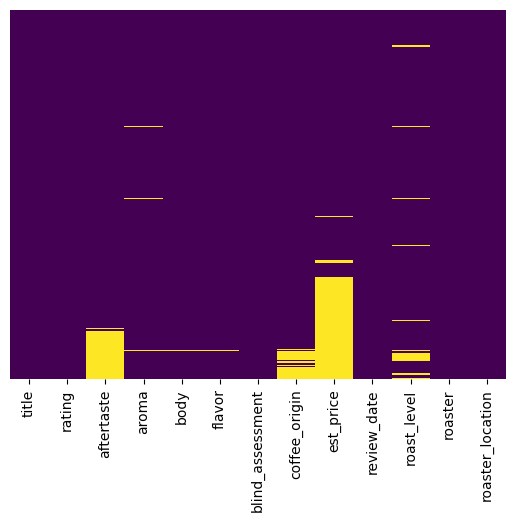

In [4]:
# Let's visualize the missing data at this point. 
sns.heatmap(coffee_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()
# I'm going to delete all observations that are missing values. The 'est-price' feature, especially, is important to me, 
# so I don't want to have missing values there.


In [5]:
# Let's delete the rows that are missing data...
coffee_df.shape


(7041, 13)

In [6]:
coffee_df = coffee_df.dropna(axis=0, how='any')
coffee_df.shape


(4912, 13)

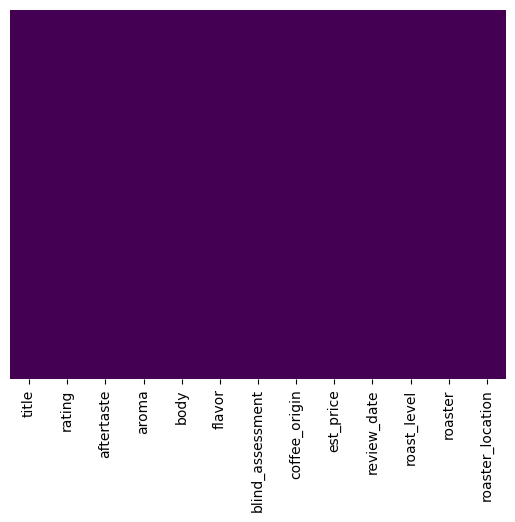

In [7]:
# Let's make sure it's all cleaned up!
sns.heatmap(coffee_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()
# Beautiful purple rectangle...


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [8]:
# -Recode 'est_price' to be consistent. It needs a lot of work! 
# Ok, this is the biggest task I have... I'm going to recode them to all have the same unit: Dollars per 12 oz.
# And I'll want this as a float, so I'll rename the column to signify the units.
coffee_df['est_price'] = coffee_df['est_price'].str.replace('$', '')
    
coffee_df.head()

# -Recode all ratings to int or float 


C:\Users\samia\AppData\Local\Temp\ipykernel_15824\2576381386.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coffee_df['est_price'] = coffee_df['est_price'].str.replace('$', '')


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California"
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California"
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


In [9]:
# Let's see if there are any prices without '/'. Probably not, but it's a good place to start!
not_weirdos = coffee_df['est_price'].str.contains('/')
not_weirdos.value_counts()
# 13 of them! Let's take a closer look.


True     4899
False      13
Name: est_price, dtype: int64

In [10]:
weirdos = coffee_df[~coffee_df['est_price'].str.contains('/')]
weirdos
# Wow, the 13 observations where the price does not include '/' are just garbage. I'll drop them.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location
412,Ethiopia Tamiru Tadesse Tesema Anaerobic Natural,95,9.0,9,9,9,"Intensely aromatic, richly sweet-savory, deepl...","Sidama growing region, southern Ethiopia",NA (available in store only),January 2022,Medium-Light,GK Coffee,"Yilan, Taiwan"
1961,Best of Panama GNEP-01 Elida Geisha Green Tip ...,97,9.0,9,9,10,"Nuanced, ethereal, yet exceptionally lush. Ap...","Boquete growing region, western Panama",See website for more information,September 2019,Medium-Light,Willoughby's Coffee & Tea,"Branford, Connecticut"
3134,Bolivia Finca Las Tacanas,92,8.0,9,8,9,"Deeply pungent, original, complex. Pecan, pome...","La Paz Department, Western Bolivia.",See review note,February 2015,Medium-Light,Apasionado Coffee,"Coroico, Bolivia."
3304,Ethiopia Sidama Akrabi,94,8.0,9,9,9,"Richly pungent, juicy. Honeysuckle, mango, alm...","Guji Zone, Sidama Province, southern Ethiopia.",15.00,September 2015,Medium-Light,Illuminista Coffee Roasters,"Lake, Michigan"
3462,Guatemala El Diamante Patricia Diaz Microlot,93,9.0,9,8,9,"Round, deeply sweet; layered complexity. Brown...","San Pedro Necta, Huehuetenango growing region,...",18.00,February 2014,Medium-Light,Temple Coffee and Tea,"Sacramento, California"
3547,Ethiopia Guji Shakiso,92,8.0,9,8,9,"Sweet, juicy, complex. Orange- and guava-like ...","Guji Zone, Oromia Region, Sidama Province, Eth...",£6.50 for 250g,May 2014,Light,Clifton Coffee Roasters,"Bristol, England, United Kingdom"
3559,Sumatra Lintong,90,8.0,8,8,8,"Deep, pungent, complex. Spicy scorched cedar, ...","Lintong growing region, northern Sumatra, Indo...",11.99,June 2014,Medium-Dark,Allegro Coffee,"Thornton, Colorado"
4062,Lennette Kenya,94,9.0,9,8,9,"Juicy, sweetly bright. Blood orange, lily-like...","Nyeri growing region, south-central Kenya.",17.99,November 2013,Medium-Light,Bird Rock Coffee Roasters,"La Jolla, California"
4157,P&F Espresso Blend,92,9.0,8,9,9,Evaluated as espresso. In the small cup rich a...,Not disclosed.,Not available.,March 2012,Medium-Dark,P&F Coffee,"Bangkok, Thailand"
4177,Kenya Kangocho,89,8.0,8,8,8,"Very sweet but quite tart, on the edge of sour...","Nyeri County, Kenya",Not Available,April 2012,Medium-Light,ChacolaTAY,"Taichung City, Taiwan"


In [11]:
coffee_df = coffee_df.drop(coffee_df[~coffee_df['est_price'].str.contains('/')].index)
coffee_df.shape


(4899, 13)

In [12]:
# Let's split the est_price into a list of of the number and the unit. We'll name it 'price_units'.
coffee_df['price_units'] = coffee_df['est_price'].str.split('/')
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia","[30.00, 12 ounces]"
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio","[160.00, 12 ounces]"
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California","[28.00, 12 ounces]"
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California","[20.50, 12 ounces]"
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[18.99, 8 ounces]"


In [13]:
# Now we'll boil that down further into a column named 'units_pricing', which displays the units.
def pricing_units(obj):
    return obj.apply(lambda x: x[1])
coffee_df['units_pricing'] = pricing_units(coffee_df['price_units'])
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia","[30.00, 12 ounces]",12 ounces
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio","[160.00, 12 ounces]",12 ounces
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California","[28.00, 12 ounces]",12 ounces
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California","[20.50, 12 ounces]",12 ounces
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[18.99, 8 ounces]",8 ounces


In [14]:
# And 'digits_pricing' will display the $amount per unit.
def pricing_digits(obj):
    return obj.apply(lambda x: x[0])
coffee_df['digits_pricing'] = pricing_digits(coffee_df['price_units'])
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia","[30.00, 12 ounces]",12 ounces,30.00
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio","[160.00, 12 ounces]",12 ounces,160.00
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California","[28.00, 12 ounces]",12 ounces,28.00
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California","[20.50, 12 ounces]",12 ounces,20.50
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[18.99, 8 ounces]",8 ounces,18.99


In [15]:
coffee_df['units_pricing'].value_counts()
# Whoa! I'm surprised that there are 182 different types of units in this column!
# Some of them at the end look like they definitely need cleaning...


12 ounces                   2521
8 ounces                     611
16 ounces                    412
4 ounces                     133
227 grams                    119
                            ... 
14 single-serve capsules       1
3 pounds                       1
12 sticks                      1
8 ounces*                      1
320 grams                      1
Name: units_pricing, Length: 182, dtype: int64

In [16]:
# Let's break it down further.
# 'units_left' will display the number of units (ex: $30/12oz => 12).
coffee_df['units_left'] = coffee_df['units_pricing'].apply(lambda x: x.split(' ')[0])
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia","[30.00, 12 ounces]",12 ounces,30.00,12
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio","[160.00, 12 ounces]",12 ounces,160.00,12
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California","[28.00, 12 ounces]",12 ounces,28.00,12
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California","[20.50, 12 ounces]",12 ounces,20.50,12
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[18.99, 8 ounces]",8 ounces,18.99,8


In [17]:
# And units_right will display if it's ounces, grams, what have you.
pattern = '|'.join(['0','1','2','3','4','5','6','7','8',' ','9'])
coffee_df['units_right'] = coffee_df['units_pricing'].str.replace(pattern, '')

coffee_df.head()
# Now we can filter down by units and make our changes.


C:\Users\samia\AppData\Local\Temp\ipykernel_15824\3630454206.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  coffee_df['units_right'] = coffee_df['units_pricing'].str.replace(pattern, '')


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia","[30.00, 12 ounces]",12 ounces,30.00,12,ounces
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio","[160.00, 12 ounces]",12 ounces,160.00,12,ounces
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,December 2022,Medium-Light,Mostra Coffee,"San Diego, California","[28.00, 12 ounces]",12 ounces,28.00,12,ounces
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,November 2022,Medium-Light,Regent Coffee,"Glendale, California","[20.50, 12 ounces]",12 ounces,20.50,12,ounces
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[18.99, 8 ounces]",8 ounces,18.99,8,ounces


In [18]:
coffee_df['units_right'].value_counts()
# Ok, we can definitely clean most of this up. I'll replace 'oz.' and '.ounces' with 'ounces' to combine them, 
# and drop all K-Cups and weird exceptions.


ounces                                    3858
grams                                      596
oz.                                        187
K-Cups                                      46
.ounces                                     28
                                          ... 
.grams                                       1
grams;.                                      1
ounces(seenotes)                             1
.pounds                                      1
oz.(incl.expressshippingfromGuatemala)       1
Name: units_right, Length: 63, dtype: int64

In [19]:
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_right'] == 'K-Cups'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_right'] == 'ounces(seenotes)'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_right'] == 'oz.(incl.expressshippingfromGuatemala)'].index)
coffee_df['units_right'].value_counts()
# Nice! This part of the data is pretty filthy, but now I can move it into a list to make it easier to drop items.


ounces                                              3858
grams                                                596
oz.                                                  187
.ounces                                               28
grams(.oz.)                                           22
capsules                                              19
g.(.oz.)                                              12
pods                                                  11
pound                                                 11
g                                                      8
g.                                                     8
K-cups                                                 6
single-servecapsules                                   6
RealCupcapsules                                        6
pounds                                                 5
ounces(grams)                                          4
ounces.                                                4
kg.(.lbs.)                     

In [20]:
coffee_df['units_right'].unique().tolist()


['ounces',
 'grams',
 'g',
 '.ounces',
 '-grampacket',
 'grams;.',
 '-gramtin',
 '-grampouches',
 'ounces(types)',
 'kilo(.ounces)',
 'ounces;.',
 'ounces(includesshipping)',
 'ounces(.',
 'ounces(currentlyonsalefor.)',
 'ounces(packagedasa"duo"withtheBourbonReyJamaica)',
 'pounds',
 'sticks',
 'ounces*',
 'ounces(packagedasa"duo"withBourbonReyGuatemala)',
 'ounces;limitedavailability',
 'ounces(grams)',
 'ouncesonline;.',
 'capsules',
 'gram',
 'eight.grampackets',
 'eight-gramtubes',
 'six-gramsingle-servepackets',
 'six-grampackets',
 'five-gramsingle-servepackets',
 'kilogram',
 '.grams',
 'K-cups',
 'ounces(soldout)',
 '.pounds',
 'ounces(freeshipping)',
 'single-servecapsules',
 'g.',
 'single-servepods',
 'Vue-Packs',
 'pods',
 'capsultes',
 'single-servecups',
 'RealCupcapsules',
 'ounces.',
 'onces',
 'grams(.oz.)',
 'Single-ServePods',
 'kg.(.lbs.)',
 'grams(.oz)',
 'ouncues',
 'TDiscs',
 'grams(.ounces)',
 'ounce',
 'Kilogram',
 'oz.',
 'g(.oz.)',
 'g.(.oz.)',
 '.oz.',
 'pou

In [21]:
# Now to drop anything that is not clearly ounces, grams, kilograms, or pounds.
drop_list = ['-grampacket',
 '-gramtin',
 '-grampouches',
 'kilo(.ounces)',
 'sticks',
 'capsules',
 'eight.grampackets',
 'eight-gramtubes',
 'six-gramsingle-servepackets',
 'six-grampackets',
 'five-gramsingle-servepackets',
 'K-cups',
 'single-servecapsules',
 'single-servepods',
 'Vue-Packs',
 'pods',
 'capsultes',
 'single-servecups',
 'RealCupcapsules',
 'grams(.oz.)',
 'Single-ServePods',
 'kg.(.lbs.)',
 'grams(.oz)',
 'TDiscs',
 'grams(.ounces)',
 'g(.oz.)',
 'g.(.oz.)',
 'g.(.oz)']

for item in drop_list:
        coffee_df = coffee_df.drop(coffee_df[coffee_df['units_right'] == item].index)

coffee_df['units_right'].unique()
# Success! Now I'll write some loops to put all of the ounces together, all of the grams together, etc..


array(['ounces', 'grams', 'g', '.ounces', 'grams;.', 'ounces(types)',
       'ounces;.', 'ounces(includesshipping)', 'ounces(.',
       'ounces(currentlyonsalefor.)',
       'ounces(packagedasa"duo"withtheBourbonReyJamaica)', 'pounds',
       'ounces*', 'ounces(packagedasa"duo"withBourbonReyGuatemala)',
       'ounces;limitedavailability', 'ounces(grams)', 'ouncesonline;.',
       'gram', 'kilogram', '.grams', 'ounces(soldout)', '.pounds',
       'ounces(freeshipping)', 'g.', 'ounces.', 'onces', 'ouncues',
       'ounce', 'Kilogram', 'oz.', '.oz.', 'pound'], dtype=object)

In [22]:
to_ounces = ['.ounces', 'ounces(types)',
       'ounces;.', 'ounces(includesshipping)', 'ounces(.',
       'ounces(currentlyonsalefor.)',
       'ounces(packagedasa"duo"withtheBourbonReyJamaica)',
       'ounces*', 'ounces(packagedasa"duo"withBourbonReyGuatemala)',
       'ounces;limitedavailability', 'ounces(grams)', 'ouncesonline;.',
        'ounces(soldout)',
       'ounces(freeshipping)', 'ounces.', 'onces', 'ouncues',
       'ounce', 'oz.', '.oz.']
to_grams = ['g', 'grams;.', 'gram', '.grams', 'g.']
to_pounds = ['.pounds', 'pound']
to_kilograms = ['kilogram', 'Kilogram']
# import re

for item in to_ounces:
    coffee_df.loc[coffee_df['units_right'] == item, 'units_right'] = 'ounces'
for item in to_grams:
    coffee_df.loc[coffee_df['units_right'] == item, 'units_right'] = 'grams'
for item in to_pounds:
    coffee_df.loc[coffee_df['units_right'] == item, 'units_right'] = 'pounds'
for item in to_kilograms:
    coffee_df.loc[coffee_df['units_right'] == item, 'units_right'] = 'kilograms'

    
coffee_df['units_right'].unique()


array(['ounces', 'grams', 'pounds', 'kilograms'], dtype=object)

In [23]:
coffee_df.loc[coffee_df['units_right'] == 'pounds'].head()
# ok, so let's remember that the observation at index 1709 was 18.99 per 2 pounds.
# Next, we'll try to convert '2 pounds' to ounces.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right
1709,Colombian Supremo,87,7.0,7,8,8,"Richly roasty and chocolaty, floral-toned. Dar...",Colombia,18.99/2 pounds,May 2019,Medium-Dark,San Francisco Bay Coffee,"Lincoln, California","[18.99, 2 pounds]",2 pounds,18.99,2,pounds
1849,Rwandan,87,7.0,7,8,8,"Crisp, chocolaty, roast-framed. Baker’s chocol...",Rwanda,37.99/6 pounds,May 2019,Medium-Dark,Kirkland Signature (Costco),"Seattle, Washington","[37.99, 6 pounds]",6 pounds,37.99,6,pounds
1850,Colombian Supremo,90,7.0,8,8,9,"Roasty-sweet, spice-toned. Banana, orange blos...","Concordia, Colombia",17.99/3 pounds,May 2019,Medium-Dark,Kirkland Signature (Costco),"Lincoln, California","[17.99, 3 pounds]",3 pounds,17.99,3,pounds
3255,Original Italian Espresso,93,8.0,9,8,9,"Reviewed as espresso. Deep, sweetly pungent, r...","Mogiana growing region, São Paulo State, Brazi...",29.99/2.2 pounds,July 2015,Medium,Testa Rossa,"Belluno, Italy","[29.99, 2.2 pounds]",2.2 pounds,29.99,2.2,pounds
4611,Organic Guatemalan Medium,88,8.0,7,8,8,"Roasted nut, fresh-cut fir and a brightening o...","El Quiche Department, south central Guatemala",57.00/5 pounds,July 2011,Medium,Equal Exchange,"West Bridgewater, Massachusetts","[57.00, 5 pounds]",5 pounds,57.00,5,pounds


In [28]:
# Some of the observations from Taiwan are in denominations I'm not sure about.
# Since there aren't many of these, I'll drop them.

coffee_df = coffee_df.drop(coffee_df.loc[coffee_df['units_left'].str.contains('g')].index)


In [29]:
coffee_df.loc[coffee_df['units_left'].str.contains('g')]


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right


In [31]:
coffee_df.loc[coffee_df['units_left'] == '']
# Well, it looks like several of these didn't properly get filled into the 'units_left' column.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right
183,Peru Gesha Limited-Release Homer Alarcón Gayoso,93,8.0,9,9,9,"Deeply rich, sweet-toned. Caramel, baking choc...","Cajamarca, Peru",30.00/ 12 ounces,October 2022,Medium-Light,Amavida Coffee Roasters,"Santa Rosa Beach, Florida","[30.00, 12 ounces]",12 ounces,30.00,,ounces
188,Guatemala Finca Las Victorias Anaerobic Natural,93,8.0,9,9,9,"Sweetly savory, deep-toned. Dark chocolate, re...","Fraijanes Plateau, Guatemala",10.00 / 8 ounces,October 2022,Medium-Light,Euphora Coffee,"Taipei, Taiwan","[10.00 , 8 ounces]",8 ounces,10.00,,ounces
510,Indonesia Sumatra Natural Aceh Musara SC19,94,8.0,9,9,9,"Aromatically intense, richly sweet-savory. Dri...","Aceh Province, northern Sumatra Indonesia",NT 350/ 8 ounces,March 2022,Light,Kakalove Cafe,"Chia-Yi, Taiwan","[NT 350, 8 ounces]",8 ounces,NT 350,,ounces
558,Ethiopia Guji Odo Shakiso,94,8.0,9,9,9,"Gently sweet-tart, complexly layered. Dried bl...","Guji Zone, Oromia Region, southern Ethiopia",17.99/ 12 ounces,April 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[17.99, 12 ounces]",12 ounces,17.99,,ounces
563,Costa Rica Brunca Rivense Las Moras Black Honey,94,8.0,9,9,9,"Juicy sweet, gently fermenty. Raspberry, thyme...","Brunca growing region, Costa Rica",NT 400/ 227 grams,April 2022,Medium-Light,Cozy House Coffee,"Taipei City, Taiwan","[NT 400, 227 grams]",227 grams,NT 400,,grams
1453,Kona Laurina Pointu,94,8.0,9,9,9,"Intricate, pungent, deeply floral. Peach, pear...","Kona, Hawaii",50.00/ 7 ounces,February 2020,Medium-Light,Kona Farm Direct,"Holualoa, Hawaii","[50.00, 7 ounces]",7 ounces,50.00,,ounces
3636,Lomi Tasha Yirgacheffe,93,8.0,9,8,9,"Sweetly and richly fermenty: rye whisky, lilac...","Yirgacheffe growing district, southern Ethiopia.",NTD 800/ 8 ounces,August 2014,Light,Big Nose Cafe,"Hsinchu city, Taiwan","[NTD 800, 8 ounces]",8 ounces,NTD 800,,ounces
3677,Ethiopia Yirgacheffe Borboya Washing Station,92,8.0,8,8,9,"Gently and sweetly pungent. Mulberry, roasted ...","Yirgacheffe growing region, southern Ethiopia.",9.00 / 8 ounces,October 2014,Medium,Uncommon Grounds Coffee and Tea,"Burlington, Vermont","[9.00 , 8 ounces]",8 ounces,9.00,,ounces
3678,Kenya Nyeri,94,9.0,9,8,9,"Intensely bright, richly floral. Lavender, vio...","Nyeri County, Central Highlands, Kenya.",18.00 / 12 ounces,October 2014,Medium,Coastal Peaks Coffee,"San Luis Obispo, California","[18.00 , 12 ounces]",12 ounces,18.00,,ounces
3713,Kenya AA Top 405A Espresso,95,8.0,9,9,10,"Evaluated as espresso. Rich, deep, complexly e...",Central Kenya.,NTD 1600 / 16 ounces,November 2014,Medium,Simon Hsieh's Aroma Roast Coffees,"Taoyuan City, Taiwan","[NTD 1600 , 16 ounces]",16 ounces,NTD 1600,,ounces


In [32]:
coffee_df['units_left'] = coffee_df['units_pricing'].apply(lambda x: x.split(' ')[0])


In [33]:
coffee_df.loc[coffee_df['units_left'] == '']
# I guess I don't know why that would work now if it didn't work the first time...
# Let's get crafty..


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right
183,Peru Gesha Limited-Release Homer Alarcón Gayoso,93,8.0,9,9,9,"Deeply rich, sweet-toned. Caramel, baking choc...","Cajamarca, Peru",30.00/ 12 ounces,October 2022,Medium-Light,Amavida Coffee Roasters,"Santa Rosa Beach, Florida","[30.00, 12 ounces]",12 ounces,30.00,,ounces
188,Guatemala Finca Las Victorias Anaerobic Natural,93,8.0,9,9,9,"Sweetly savory, deep-toned. Dark chocolate, re...","Fraijanes Plateau, Guatemala",10.00 / 8 ounces,October 2022,Medium-Light,Euphora Coffee,"Taipei, Taiwan","[10.00 , 8 ounces]",8 ounces,10.00,,ounces
510,Indonesia Sumatra Natural Aceh Musara SC19,94,8.0,9,9,9,"Aromatically intense, richly sweet-savory. Dri...","Aceh Province, northern Sumatra Indonesia",NT 350/ 8 ounces,March 2022,Light,Kakalove Cafe,"Chia-Yi, Taiwan","[NT 350, 8 ounces]",8 ounces,NT 350,,ounces
558,Ethiopia Guji Odo Shakiso,94,8.0,9,9,9,"Gently sweet-tart, complexly layered. Dried bl...","Guji Zone, Oromia Region, southern Ethiopia",17.99/ 12 ounces,April 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia","[17.99, 12 ounces]",12 ounces,17.99,,ounces
563,Costa Rica Brunca Rivense Las Moras Black Honey,94,8.0,9,9,9,"Juicy sweet, gently fermenty. Raspberry, thyme...","Brunca growing region, Costa Rica",NT 400/ 227 grams,April 2022,Medium-Light,Cozy House Coffee,"Taipei City, Taiwan","[NT 400, 227 grams]",227 grams,NT 400,,grams
1453,Kona Laurina Pointu,94,8.0,9,9,9,"Intricate, pungent, deeply floral. Peach, pear...","Kona, Hawaii",50.00/ 7 ounces,February 2020,Medium-Light,Kona Farm Direct,"Holualoa, Hawaii","[50.00, 7 ounces]",7 ounces,50.00,,ounces
3636,Lomi Tasha Yirgacheffe,93,8.0,9,8,9,"Sweetly and richly fermenty: rye whisky, lilac...","Yirgacheffe growing district, southern Ethiopia.",NTD 800/ 8 ounces,August 2014,Light,Big Nose Cafe,"Hsinchu city, Taiwan","[NTD 800, 8 ounces]",8 ounces,NTD 800,,ounces
3677,Ethiopia Yirgacheffe Borboya Washing Station,92,8.0,8,8,9,"Gently and sweetly pungent. Mulberry, roasted ...","Yirgacheffe growing region, southern Ethiopia.",9.00 / 8 ounces,October 2014,Medium,Uncommon Grounds Coffee and Tea,"Burlington, Vermont","[9.00 , 8 ounces]",8 ounces,9.00,,ounces
3678,Kenya Nyeri,94,9.0,9,8,9,"Intensely bright, richly floral. Lavender, vio...","Nyeri County, Central Highlands, Kenya.",18.00 / 12 ounces,October 2014,Medium,Coastal Peaks Coffee,"San Luis Obispo, California","[18.00 , 12 ounces]",12 ounces,18.00,,ounces
3713,Kenya AA Top 405A Espresso,95,8.0,9,9,10,"Evaluated as espresso. Rich, deep, complexly e...",Central Kenya.,NTD 1600 / 16 ounces,November 2014,Medium,Simon Hsieh's Aroma Roast Coffees,"Taoyuan City, Taiwan","[NTD 1600 , 16 ounces]",16 ounces,NTD 1600,,ounces


In [34]:
def crafty(value):
    nums = 0
    for item in value:
        if len(item.astype(float) > 0):
            num += item
    return num
coffee_df['units_left'] = coffee_df['units_pricing'].apply(crafty)
coffee_df.loc[coffee_df['units_left'] == '']


AttributeError: 'str' object has no attribute 'astype'

In [30]:
# Now to convert everything to ounces

def pounds_to_ounces(pounds):
    return (pounds.astype(float))*16
def grams_to_ounces(grams):
    return grams*(0.03527396)
def kilograms_to_ounces(kilograms):
    return kilograms*(35.27396)

coffee_df.loc[coffee_df['units_right'] == 'pounds', 'units_left'] = pounds_to_ounces(coffee_df['units_left'])
coffee_df.loc[coffee_df['units_right'] == 'pounds'].head()


ValueError: could not convert string to float: ''

In [46]:
ounces['units_left'].value_counts()
# Interesting! At least that's a digestible amount to work with. Right off the bat, I'll remove the empty value
# and re-format the 2 '16ounces' observations.


12          2521
8            611
16           412
4            133
10            66
6             49
7             12
11            10
               9
14             7
32             6
24             4
13             4
5              3
16ounces       2
48             2
22             1
2              1
30             1
28             1
36             1
40             1
17             1
Name: units_left, dtype: int64

In [21]:
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_left'] == ''].index)
coffee_df.shape
# Interesting.. While there were only 9 observations that were blank in the ounces table, 
# there were 61 total in the entire dataframe! Happy to see them go.


(4838, 18)

In [22]:
# Now to re-format the '16ounces' observations.
sixteen = coffee_df[coffee_df['units_left'] == '16ounces']
sixteen
# Neat! These must be listed in a Taiwanese denomination. Since I'm unsure of the exchange rate and it's only 2 rows,
# I'll drop these observations instead of re-formating them.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,review_date,roast_level,roaster,roaster_location,price_units,units_pricing,digits_pricing,units_left,units_right
4226,Little Sugar Blend Espresso,90,8.0,8,7,8,"Evaluated as espresso. Crisp, round, balanced....",Not disclosed.,NT 700/16ounces,June 2012,Medium-Dark,Bacca Cafe,"Tainan City, Taiwan","[NT 700, 16ounces]",16ounces,NT 700,16ounces,ounces
4347,House Blend,90,8.0,9,8,9,"Evaluated as espresso. Deep, earthy, savory. D...",Not disclosed.,NT 700/16ounces,November 2012,Medium-Dark,CofFeeling,"Kaohsiung City, Taiwan","[NT 700, 16ounces]",16ounces,NT 700,16ounces,ounces


In [23]:
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_left'] == '16ounces'].index)
coffee_df.shape


(4836, 18)

In [26]:
# Ok, now to create a function that will convert any number of $/oz into $/12oz
ounces['units_left'].dtypes
# coffee_df['price_12oz'] = ounces['digits_pricing']*(ounces['units_left']/12)
# coffee_df.head()


dtype('O')

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [2]:
coffee_df.describe()


,acidity_structure,aftertaste
count,2166.000000,6169.000000
mean,8.487535,7.968552
std,0.629954,0.722743
min,1.000000,2.000000
25%,8.000000,8.000000
50%,9.000000,8.000000
75%,9.000000,8.000000
max,10.000000,10.000000


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?